In [1]:
import requests
import bs4 as bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
url = 'https://www.espn.com/soccer/stats/_/league/caf.nations'

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

resp = requests.get(url, headers=headers)

print(resp.status_code)

200


In [3]:
soup = BeautifulSoup(resp.text, 'html.parser')
tables = soup.find_all('table')

table1 = tables[0]
Goals = pd.read_html(str(table1))[0]
Goals.head()
Goals.to_excel('goals.xlsx')


In [4]:
table2 = tables[1]
Assists = pd.read_html(str(table2))[0]
Assists.head()
Assists.to_excel('assists.xlsx')

Let us explore players who scored more than a goal

In [5]:
total_goals = Goals['G'].sum()
total_goals

81

In [6]:
df = Goals[Goals['G']>1]
df.to_excel('top_scorers.xlsx')
df

,RK,Name,Team,P,G
0,1.0,Emilio Nsue,Equatorial Guinea,4,5
1,2.0,Gelson Dala,Angola,5,4
2,NaN,Mostafa Mohamed,Egypt,4,4
3,4.0,Ademola Lookman,Nigeria,6,3
4,NaN,Lassine Sinayoko,Mali,5,3
5,NaN,Mabululu,Angola,5,3
6,NaN,Mohamed Bayo,Guinea,5,3
7,NaN,Bertrand Traoré,Burkina Faso,4,3
8,NaN,Baghdad Bounedjah,Algeria,3,3
9,10.0,Teboho Mokoena,South Africa,6,2


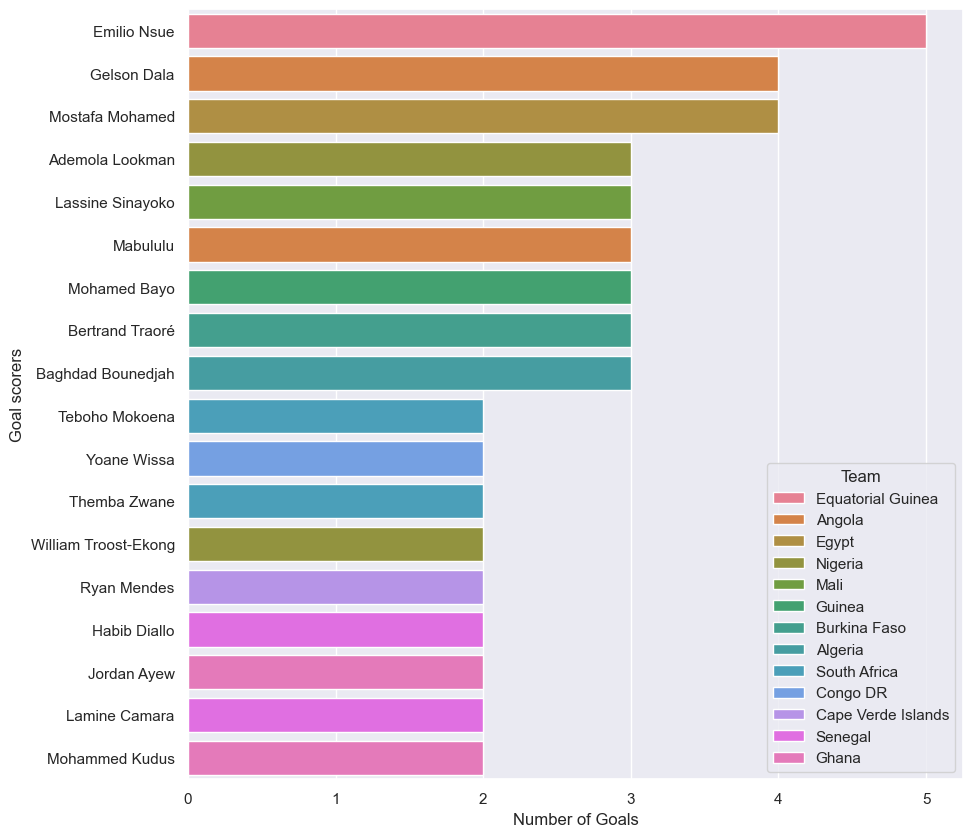

In [7]:
#Plotting goal scorers
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
sns.barplot(data=df, x=df['G'], y=df['Name'], orient='h', hue='Team')
plt.xlabel('Number of Goals')
plt.ylabel('Goal scorers')
plt.show()

In [8]:
country_goals = Goals[['Team', 'G']].groupby('Team').sum().reset_index()
country_goals = country_goals.sort_values(by='G', ascending=False)
country_goals

,Team,G
1,Angola,9
17,South Africa,7
4,Cape Verde Islands,7
7,Equatorial Guinea,7
16,Senegal,6
15,Nigeria,6
5,Congo DR,6
11,Mali,4
9,Guinea,4
8,Ghana,4


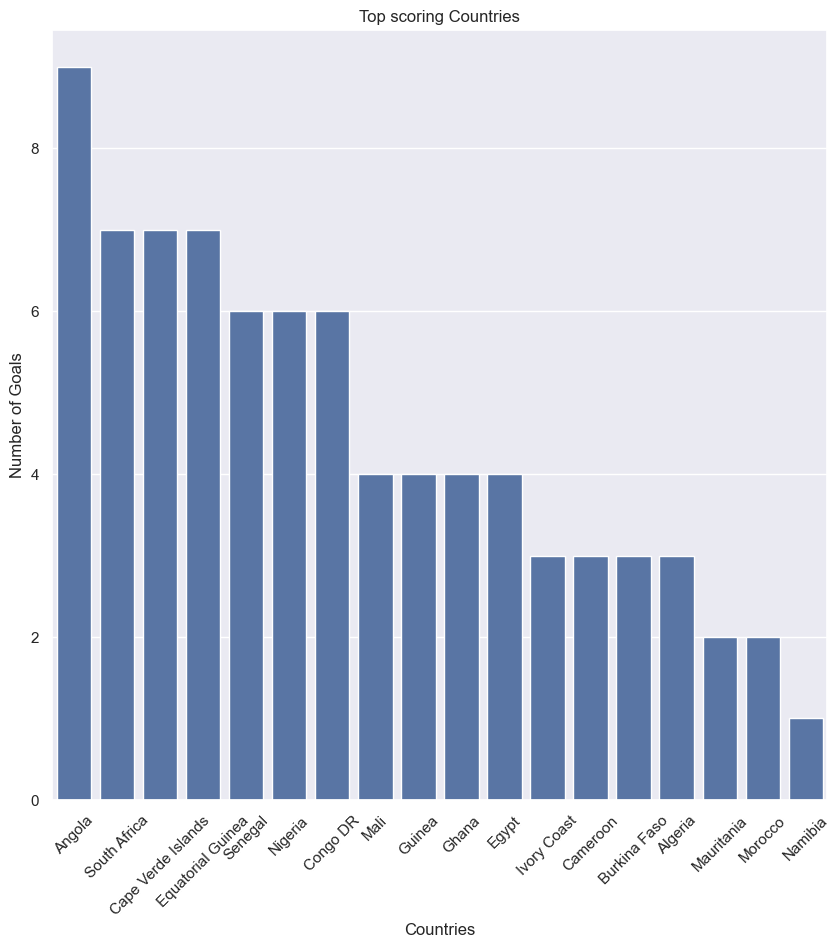

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(data=country_goals, x=country_goals['Team'], y=country_goals['G'], errorbar=None)
plt.xticks(rotation=45)
plt.xlabel('Countries')
plt.ylabel('Number of Goals')
plt.title('Top scoring Countries')
plt.show()

In [10]:
Assists.head()

,RK,Name,Team,P,A
0,1.0,Fredy,Angola,5,3
1,NaN,Sadio Mané,Senegal,4,3
2,NaN,Georges-Kévin N'Koudou,Cameroon,4,3
3,NaN,José Machín,Equatorial Guinea,4,3
4,5.0,Seko Fofana,Ivory Coast,6,2


In [33]:
top_assist = Assists[['Name', 'A']]
X=top_assist[top_assist['A'] == top_assist['A'].max()]
X.to_excel('top_assist.xlsx')
X

,Name,A
0,Fredy,3
1,Sadio Mané,3
2,Georges-Kévin N'Koudou,3
3,José Machín,3
